<a href="https://colab.research.google.com/github/saurabhbarge/CE888-7-SP/blob/main/Project2_TweetEval/Irony.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Importing all the Libraries**

In [26]:
import numpy as np
import pandas as pd
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem.porter import PorterStemmer
from nltk.stem import WordNetLemmatizer
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
import re
import string
from wordcloud import WordCloud
from matplotlib import pyplot as plt 
%matplotlib inline
import seaborn as sns

In [27]:
nltk.download('stopwords')
nltk.download('punkt')
nltk.download('wordnet')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

In [28]:
stop_words = list(set(stopwords.words('english'))) # list of stop words

In [29]:
stemmer = PorterStemmer() # creating stemmer object

In [30]:
lemmatizer = WordNetLemmatizer() # creating lemmatizer object

**Pre-processing Function includes the following:**
**-removes punctuations**
**,removes digits**
**,removes word 'user' which is frequently used in the datasets**
**,removes stopwords**
**,performed stemming**
**,performed lemmatization**

In [31]:
def pre_processing(text):
    text  = "".join([char for char in text if char not in string.punctuation])
    text = re.sub('[0-9]+', '', text)
    text = re.sub('user','',text)
    text = ' '.join([x for x in word_tokenize(text) if x not in stop_words])
    text = ' '.join([stemmer.stem(x) for x in word_tokenize(text)])
    text = ' '.join([lemmatizer.lemmatize(x) for x in word_tokenize(text)])
    return text

**Function for removing emojis**

In [32]:
def remove_emoji(string):
    emoji_pattern = re.compile("["
                           u"\U0001F600-\U0001F64F"  # emoticons
                           u"\U0001F300-\U0001F5FF"  # symbols & pictographs
                           u"\U0001F680-\U0001F6FF"  # transport & map symbols
                           u"\U0001F1E0-\U0001F1FF"  # flags (iOS)
                           u"\U00002702-\U000027B0"
                           u"\U000024C2-\U0001F251"
                           "]+", flags=re.UNICODE)
    return emoji_pattern.sub(r'', string)

In [33]:
with open("/content/drive/MyDrive/irony/train_text.txt") as data1:
    ir_traintext = data1.read()

In [34]:
with open("/content/drive/MyDrive/irony/train_labels.txt") as data2:
    ir_trainlabels = data2.read()

In [35]:
ir_traintext = ir_traintext.split('\n')

In [36]:
ir_trainlabels = ir_trainlabels.split('\n')

**Converting all the characters in the text to Lowercase**

In [37]:
ir_traintext = [x.lower() for x in ir_traintext]

In [38]:
df_irony = pd.DataFrame({'Irony_Text':ir_traintext,'Irony_labels':ir_trainlabels})

**Mapping Labels**

In [39]:
df_irony['Irony_labels'] = df_irony['Irony_labels'].map({'0': 'non_irony', '1': 'irony'})

In [40]:
df_irony.head()

,Irony_Text,Irony_labels
0,seeing ppl walking w/ crutches makes me really...,irony
1,"look for the girl with the broken smile, ask h...",non_irony
2,now i remember why i buy books online @user #s...,irony
3,@user @user so is he banded from wearing the c...,irony
4,just found out there are etch a sketch apps. ...,irony


In [41]:
df_irony['Irony_Text'] = df_irony['Irony_Text'].apply(lambda x: pre_processing(x))

In [42]:
df_irony['Irony_Text'] = df_irony['Irony_Text'].apply(lambda x: remove_emoji(x))

**Cleaned Data**

In [43]:
df_irony.head()

,Irony_Text,Irony_labels
0,see ppl walk w crutch make realli excit next w...,irony
1,look girl broken smile ask want stay love,non_irony
2,rememb buy book onlin servicewithasmil,irony
3,band wear cloth karma,irony
4,found etch sketch app oldschool notoldschool,irony


In [44]:
df_irony.shape # dimensions of the dataframe

(2863, 2)

**Checking the count of labels**

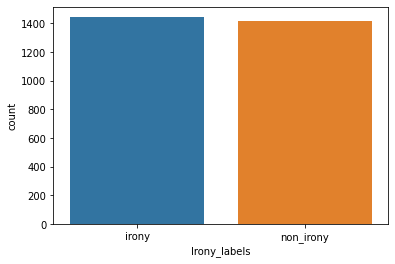

In [45]:
sns.countplot(x="Irony_labels", data=df_irony)

**Checking for Missing Values**

In [46]:
df_irony.isna().sum()

Irony_Text      0
Irony_labels    1
dtype: int64

**WORD CLOUD**

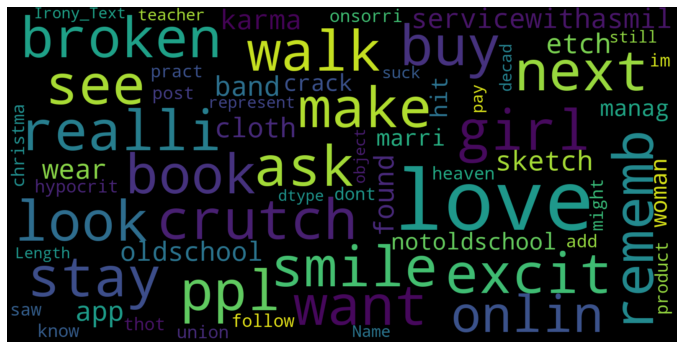

In [47]:
wordcloud = WordCloud(width=1600, height=800, max_font_size=200).generate(str(df_irony['Irony_Text']))
plt.figure(figsize=(12,10))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

**Using CountVectorizer and TF-IDF Vectorizer for translating text data into numeric form acceptable by the model**

In [48]:
cv = CountVectorizer(stop_words='english',max_features=10000)
cv_train_features = cv.fit_transform(df_irony['Irony_Text'])

In [49]:
cv_train_features

<2863x6462 sparse matrix of type '<class 'numpy.int64'>'
	with 18474 stored elements in Compressed Sparse Row format>

In [50]:
tf = TfidfVectorizer(min_df=0.0, max_df=1.0, ngram_range=(1,2),
                     sublinear_tf=True)
tf_train_features = tf.fit_transform(df_irony['Irony_Text'])

In [51]:
tf_train_features

<2863x23682 sparse matrix of type '<class 'numpy.float64'>'
	with 38685 stored elements in Compressed Sparse Row format>

In [52]:
print('Bag of Words model: Train features shape:', cv_train_features.shape)
print('TFIDF model: Train features shape:', tf_train_features.shape)

Bag of Words model: Train features shape: (2863, 6462)
TFIDF model: Train features shape: (2863, 23682)
